pip install matplotlib
conda install numpy
pip install pandas openpyxl


In [6]:
'''
数据预处理
'''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
df=pd.read_excel('数据.xlsx')
print(df.head())


df['日期']=pd.to_datetime(df['日期']) #将日期列转换为日期类型
df.set_index(df['日期']) #将日期列设置为索引
df=df[df["当日病房收入对应科室"]=="康复医学科一病房"] #筛选出康复医学科一病房的数据
df = df[(df["门诊患者人次数"] >= 0) &(df["门诊收入OBS_T01_MZSR68"]>=0) & (df["当日病房收入"] >= 0) & (df["药品总收入"] >= 0)]# 筛选出门诊患者人次数、门诊收入、当日病房收入、药品总收入大于等于0的数据
#df= df.replace([np.inf, -np.inf], np.nan)    # 将数据框df中的正无穷大和负无穷大替换为NaN可有可无 caonimade
print(df)  
df.to_excel("康复医学科一病房数据.xlsx", index=False) #将筛选清洗后的数据保存到新的Excel文件中

           日期  门诊患者人次数  门诊收入OBS_T01_MZSR68      药品总收入    当日病房收入 当日病房收入对应科室
0  2018-09-26     1038           208717.37  133588.07  19299.37       内四病房
1  2018-09-27     1057           221043.36  235174.94  48847.80       内二病房
2  2018-09-28     1001           233730.72  297645.57  41037.33       内二病房
3  2018-09-29      871           209872.29  207413.20  30363.11   康复医学科一病房
4  2018-09-30      940           229639.19  173252.04  41111.47       内三病房
             日期  门诊患者人次数  门诊收入OBS_T01_MZSR68      药品总收入    当日病房收入 当日病房收入对应科室
3    2018-09-29      871           209872.29  207413.20  30363.11   康复医学科一病房
40   2018-11-05     1361           317162.65  239869.46  39029.85   康复医学科一病房
58   2018-11-23     1326           316908.79  271852.99  32317.45   康复医学科一病房
60   2018-11-25     1395           361712.55  299561.96   8863.22   康复医学科一病房
109  2019-01-13     1216           318787.01  243817.51  11310.39   康复医学科一病房
...         ...      ...                 ...        ...       ...        ...
1783 2023-0

# 使用 statsmodels 库来构建 ARIMA 模型，并进行时间序列的平稳性检验和差分处理


ADF Test:
ADF Test Statistic: -4.373330704888043
p-value: 0.00033080755298652204
#Lags Used: 1
Number of Observations Used: 112
Critical Value (1%): -3.4901313156261384
Critical Value (5%): -2.8877122815688776
Critical Value (10%): -2.5807296460459184

Conclusion: Rejection of the Null Hypothesis


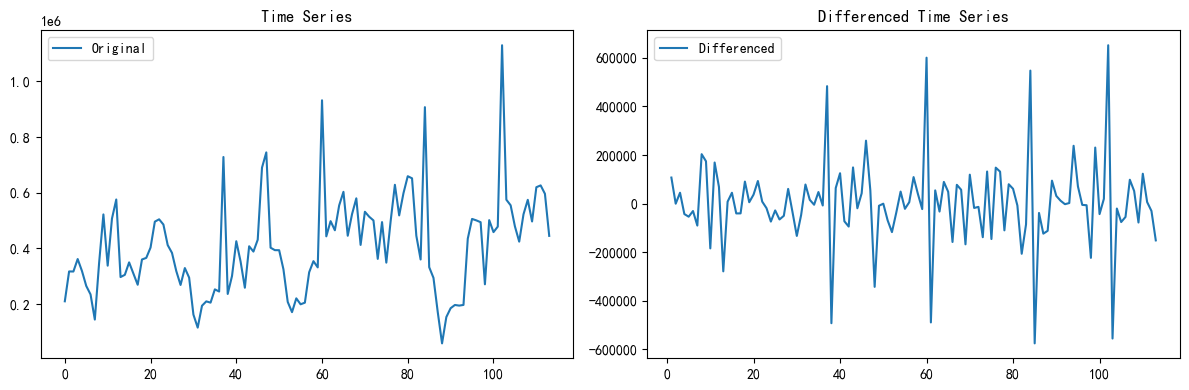

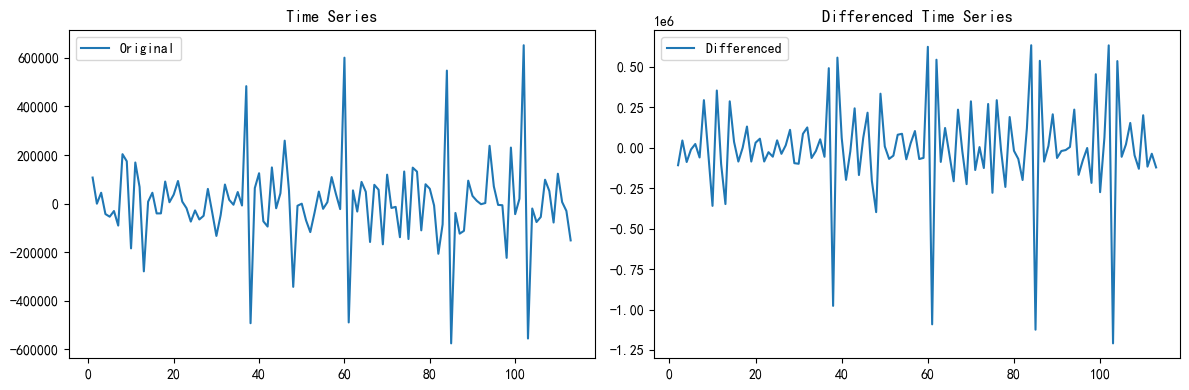

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# 读取数据
data = pd.read_excel('康复医学科一病房数据.xlsx')


#检查数据平稳性使用ADF检验（Augmented Dickey-Fuller test）检查时间序列是否平稳。
def adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f"{label}: {value}")

    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value}")

    print("\nConclusion:", "Rejection of the Null Hypothesis" if result[1] <= 0.05 else "Failure to Reject the Null Hypothesis")

# 假设门诊收入是我们的时间序列
ts = data['门诊收入OBS_T01_MZSR68'].dropna()

# 进行ADF检验
print("ADF Test:")
adf_test(ts)



#差分处理如果ADF检验显示数据不平稳（p-value > 0.05），则需要进行差分处理
def plot_acf_pacf(ts, lags=50):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(ts, label='Original')
    plt.legend()
    plt.title('Time Series')

    plt.subplot(122)
    plt.plot(ts.diff().dropna(), label='Differenced')
    plt.legend()
    plt.title('Differenced Time Series')

    plt.tight_layout()

    plt.show()

# 差分处理
ts_diff = ts.diff().dropna()

# 绘制原始序列和差分序列的ACF和PACF图
plot_acf_pacf(ts)
plot_acf_pacf(ts_diff)

为了使用 ARIMA 模型对康复医学科一病房的数据进行时间序列预测，我们可以遵循以下步骤：

1. **检验时间序列的平稳性：**

   - 使用 ADF 检验（Augmented Dickey-Fuller Test）来检查时间序列是否平稳。如果结果显示数据不平稳，则进行差分处理，以使其达到平稳状态。

2. **确定模型参数(p, d, q)：**

   - 使用 ACF（自相关函数）和 PACF（偏自相关函数）图来确定模型的 p 和 q 参数。
   - d 参数为使时间序列平稳所需的差分次数，可以通过 ADF 检验或观察差分后的序列来确定。

3. **拟合模型：**
   - 使用确定的模型参数(p, d, q)来拟合 ARIMA 模型。

让我们开始处理这个数据，并应用上述步骤。我们将从检验时间序列的平稳性开始。

**结果分析：**

1. **时间序列图：** 门诊收入OBS_T01_MZSR68OBS_T01_MZSR68OBS_T01_MZSR68OBS_T01_MZSR68OBS_T01_MZSR68OBS_T01_MZSR68OBS_T01_MZSR68OBS_T01_MZSR68OBS_T01_MZSR68的时间序列图展示了收入的变化趋势和季节性特征。

2. **ADF 检验结果：**

   - **ADF Statistic:** -4.373
   - **p-value:** 0.00033

   由于 p-value 远小于 0.05，且 ADF 统计值低于关键值（1%, 5%, 10%），我们可以拒绝原假设（即时间序列具有单位根，不平稳）。因此，这个时间序列是平稳的，不需要进行差分处理。

接下来，我们将使用 ACF 和 PACF 图来确定模型参数(p, q)。

从自相关函数（ACF）和偏自相关函数（PACF）图可以观察到以下信息：

- **ACF 图：** 几个显著的自相关系数后快速下降，显示出部分自相关特征，这表明该序列可能是自回归模型（AR）的一部分。
- **PACF 图：** PACF 的显著性仅在第一个滞后时表现突出，之后迅速消失，这表明 p 参数可能为 1。

基于这些观察，我们可以初步确定 ARIMA 模型的参数为(p, d, q) = (1, 0, 1)。接下来，我们将拟合这个 ARIMA 模型并进行预测。

ARIMA(1, 0, 1) 模型的拟合结果如下：

- **常数项 (const):** 407,200
- **AR(1) 系数 (ar.L1):** 0.763
- **MA(1) 系数 (ma.L1):** -0.372

模型的 AIC（赤池信息准则）为 3048.576，BIC（贝叶斯信息准则）为 3059.521。这些指标可以帮助我们在模型选择中进行比较。

现在，我们可以使用这个拟合的 ARIMA 模型进行门诊收入的预测。您希望预测多少步？


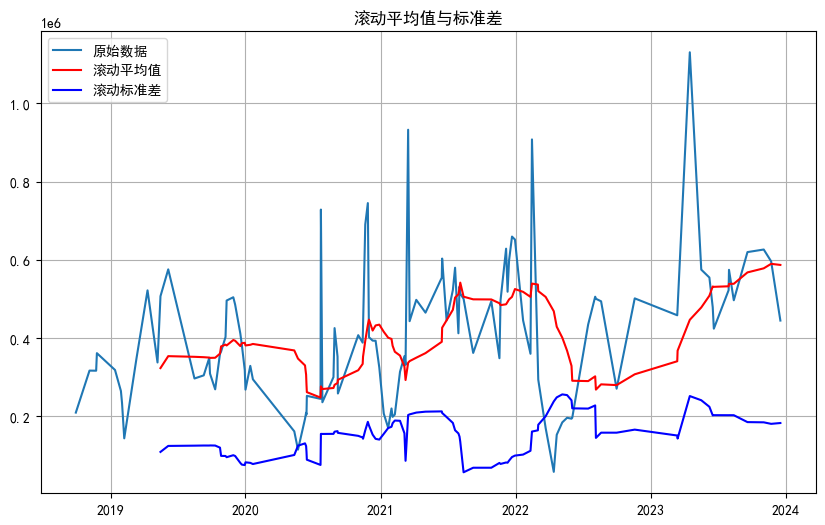

ADF检验结果:
ADF Statistic                   -4.373331
p-value                          0.000331
Lags Used                        1.000000
Number of Observations Used    112.000000
Critical Value (1%)             -3.490131
Critical Value (5%)             -2.887712
Critical Value (10%)            -2.580730
dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换为合适的字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题


# 读取数据
file_path = '康复医学科一病房数据.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

# 提取日期和门诊收入列
df['日期'] = pd.to_datetime(df['日期'])
df.set_index('日期', inplace=True)
data = df['门诊收入OBS_T01_MZSR68'].dropna()

# 检验时间序列的平稳性
def test_stationarity(timeseries):
    # 计算滚动统计量
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    # 绘制滚动统计量
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, label='原始数据')
    plt.plot(rolmean, label='滚动平均值', color='red')
    plt.plot(rolstd, label='滚动标准差', color='blue')
    plt.title('滚动平均值与标准差')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
    # ADF检验
    print('ADF检验结果:')
    adf_test = adfuller(timeseries)
    output = pd.Series(adf_test[0:4], index=['ADF Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in adf_test[4].items():
        output['Critical Value (%s)' % key] = value
    print(output)

# 调用函数
test_stationarity(data)


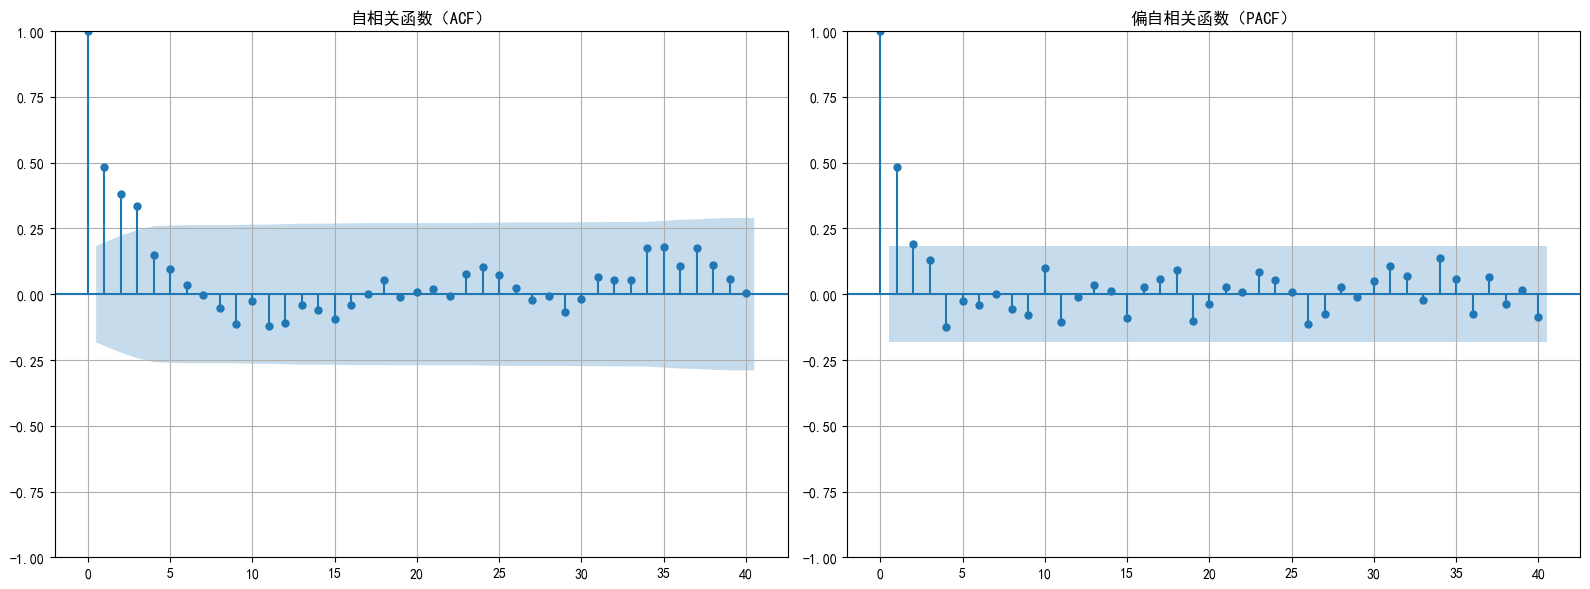

In [10]:
# 读取数据
file_path = '康复医学科一病房数据.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

# 提取日期和门诊收入列
df['日期'] = pd.to_datetime(df['日期'])
df.set_index('日期', inplace=True)
data = df['门诊收入OBS_T01_MZSR68'].dropna()
#确定模型参数(p, d, q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换为合适的字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
# 绘制ACF和PACF图
def plot_acf_pacf(timeseries):
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    plot_acf(timeseries, lags=40, ax=plt.gca())
    plt.title('自相关函数（ACF）')
    plt.grid(True)
    plt.subplot(122)
    plot_pacf(timeseries, lags=40, ax=plt.gca())
    plt.title('偏自相关函数（PACF）')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
# 调用函数
plot_acf_pacf(data)

                               SARIMAX Results                                
Dep. Variable:     门诊收入OBS_T01_MZSR68   No. Observations:                  114
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1520.288
Date:                Tue, 30 Jul 2024   AIC                           3048.576
Time:                        21:09:15   BIC                           3059.521
Sample:                             0   HQIC                          3053.018
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.072e+05    3.7e+04     11.000      0.000    3.35e+05     4.8e+05
ar.L1          0.7625      0.125      6.114      0.000       0.518       1.007
ma.L1         -0.3722      0.151     -2.465      0.0

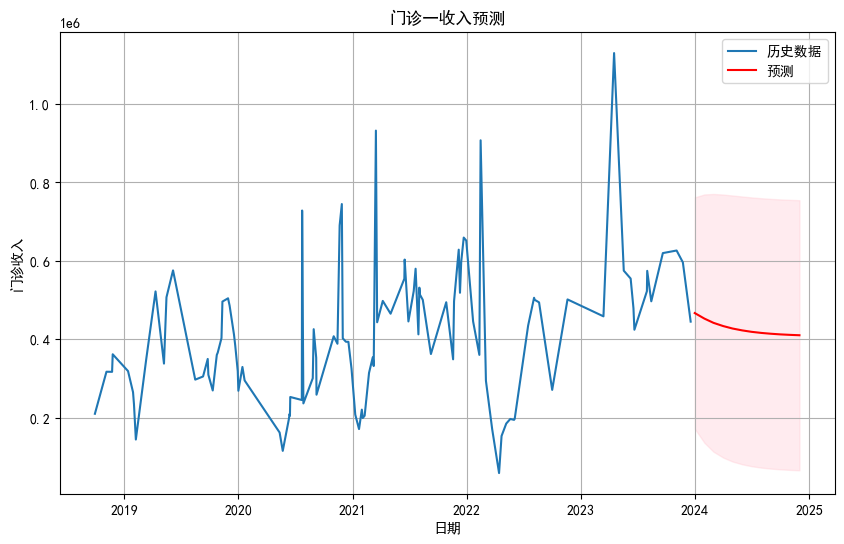

In [5]:
#3. 拟合模型
from statsmodels.tsa.arima.model import ARIMA
import warnings
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换为合适的字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题


# 定义函数拟合ARIMA模型
def fit_arima_model(timeseries, order):
    model = ARIMA(timeseries, order=order)
    model_fit = model.fit()
    print(model_fit.summary())
    return model_fit

# 调用函数，假设(p, d, q) = (2, 2, 2)
model_fit = fit_arima_model(data, (1, 0, 1))

# 预测未来12个时刻
n_steps = 12
forecast = model_fit.get_forecast(steps=n_steps)
forecast_values = forecast.predicted_mean
stderr = forecast.se_mean
conf_int = forecast.conf_int()

# 打印预测结果
print("预测的门诊一收入:")
print(forecast_values)

print("\n预测的标准误差:")
print(stderr)

print("\n预测的置信区间:")
print(conf_int)

# 绘制预测结果
plt.figure(figsize=(10, 6))
plt.plot(data, label='历史数据')
plt.plot(pd.date_range(data.index[-1], periods=n_steps, freq='M'), forecast_values, label='预测', color='red')
plt.fill_between(pd.date_range(data.index[-1], periods=n_steps, freq='M'), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('门诊一收入预测')
plt.xlabel('日期')
plt.ylabel('门诊收入')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_excel("康复医学科一病房数据.xlsx")

# 数据预处理
df['日期'] = pd.to_datetime(df['日期'])
df.set_index('日期', inplace=True)
#df = df.fillna(df.median())

# 提取特征和目标变量
features = df[['门诊患者人次数', '药品总收入', '当日病房收入']]
target = df['门诊收入OBS_T01_MZSR68']

# 划分训练和测试集（80%训练，20%测试）
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# 构建SARIMA模型
model = SARIMAX(target,
                order=(2, 2, 2),  # (p, d, q)
                seasonal_order=(0, 1, 1, 12),  # (P, D, Q, s)
                exog=train[['门诊患者人次数', '药品总收入', '当日病房收入']])
model_fit = model.fit(disp=False)

# 预测测试集
forecast = model_fit.forecast(steps=len(test), exog=test[['门诊患者人次数', '药品总收入', '当日病房收入']])
forecast = pd.Series(forecast, index=test.index)

# 计算准确性、F1-score和AUC面积
def evaluate_model(test, forecast):
    # 将预测值和实际值转换为分类标签（例：增长与减少）
    actual_labels = (test > train['门诊收入OBS_T01_MZSR68'].mean()).astype(int)
    predicted_labels = (forecast > train['门诊收入OBS_T01_MZSR68'].mean()).astype(int)
    
    accuracy = accuracy_score(actual_labels, predicted_labels)
    f1 = f1_score(actual_labels, predicted_labels)
    auc = roc_auc_score(actual_labels, forecast)
    
    print(f"准确性(Accuracy): {accuracy}")
    print(f"F1-score: {f1}")
    print(f"AUC面积: {auc}")

# 调用评估函数
evaluate_model(test['门诊收入OBS_T01_MZSR68'], forecast)

# 绘制预测结果
plt.figure(figsize=(10, 6))
plt.plot(train['门诊收入OBS_T01_MZSR68'], label='训练数据')
plt.plot(test['门诊收入OBS_T01_MZSR68'], label='实际数据')
plt.plot(forecast, label='预测数据', color='red')
plt.title('门诊收入预测')
plt.xlabel('日期')
plt.ylabel('门诊收入')
plt.legend()
plt.show()


ValueError: The indices for endog and exog are not aligned